In [1]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/Datathon/'

/content/gdrive/My Drive/Datathon


In [3]:
import pandas as pd

In [4]:
from torchtext.vocab import GloVe
import nltk.data
import nltk

In [5]:
import numpy as np

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#mean glove embedding for employment
def get_average_glove_embedding(sentence):
    tokenized = nltk.word_tokenize(sentence.lower())
    # print(tokenized)
    vectors = [glove[word.lower()].numpy() for word in sentence.split()]
    # print(type(vectors), len(vectors), vectors[0].shape)
    vectors = np.mean(np.stack(vectors), axis=0)
    return vectors

In [8]:
glove = GloVe(cache='.', name='6B')

In [9]:
df = pd.read_csv('./Data/all-accepted-with-rates.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,60,119,130,131,132,135,136,137,140,146,147,148,154,155,156,158) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df = df.dropna(subset=['emp_title'])

In [11]:
df = df[df['emp_title'] != ' ']

In [12]:
from tqdm import tqdm

In [13]:
len(df)

1877343

In [14]:
emp_glove_final = []

for i in tqdm(range(len(df['emp_title']))):
    try:
        emp_glove_final.append(get_average_glove_embedding(df['emp_title'].iloc[i]))
    except:
        # df = df.drop(index = i)
        print(i)
    

100%|██████████| 1877343/1877343 [07:26<00:00, 4209.25it/s]


In [15]:
len(df)

1877343

In [16]:
len(emp_glove_final)

1877343

In [17]:
df['emp_glove'] = emp_glove_final

In [18]:
df.head(4)['emp_glove']

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.30628, -0.14603, -0.22847, -0.46993, -0.968...
2    [0.109261, -0.053324997, 0.1377045, -0.3503050...
3    [-0.106372, -0.35893, 0.21590666, -0.42153668,...
Name: emp_glove, dtype: object

In [19]:
from sklearn.cluster import KMeans
import numpy as np

In [20]:
samples = (df.sample(180000))[['emp_title', 'emp_glove']]

In [ ]:
samples.head(5)

,emp_title,emp_glove,labels
2027930,Cafeteria Manager,"[-0.16539651, 0.51568997, 0.21124999, -0.31640...",98
743948,supervisor,"[-0.37436, 0.09029, -0.43266, -0.23471, -0.193...",14
347178,Center Commander,"[0.081893004, -0.223869, 0.36176324, -0.485919...",146
1980988,Neonatal RN,"[-0.38486502, 0.19165501, 0.0048100054, -0.087...",432
1745692,Maint. Tech,"[0.215175, 0.202245, 0.142535, -0.152255, 0.13...",32


In [ ]:
X = np.array(list(samples['emp_glove']))
kmeans = KMeans(n_clusters=500, random_state=0).fit(X)

In [ ]:
import pickle

# save
with open('kmeans-500.pkl','wb') as f:
    pickle.dump(kmeans,f)

In [21]:
import pickle
kmeans = pickle.load(open('kmeans-500.pkl', 'rb'))

In [22]:
lab = kmeans.labels_

In [23]:
samples['labels'] = lab

In [24]:
jobs_and_labels = samples[['emp_title', 'labels']]

In [25]:
jobs_and_labels.sort_values(by=['labels'])

,emp_title,labels
1851695,P&D driver,0
1315279,Sales Coordinator,0
1556738,sales,0
1176032,OPERATIONS MGR,0
912451,Horticulture Specialist,0
...,...,...
506967,Housekeeping,499
617175,Truck Driver,499
2022683,Parts Specialist,499
895050,President,499


In [26]:
sample_df = jobs_and_labels.groupby("labels").sample(n=10, random_state=1)

In [27]:
sample_df

,emp_title,labels
1851695,P&D driver,0
738140,Cost Accountant,0
1236886,Director of Information Technology,0
1833365,Bus Driver,0
1432649,Materials Technician,0
...,...,...
728093,Boilermaker,499
1089648,Office Manager,499
194674,Server,499
2010792,Sales Manager,499


In [ ]:
sample_df.to_csv('sample_df_500.csv')

In [ ]:
df['emp_glove']

0          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1          [0.30628, -0.14603, -0.22847, -0.46993, -0.968...
2          [0.109261, -0.053324997, 0.1377045, -0.3503050...
3          [-0.106372, -0.35893, 0.21590666, -0.42153668,...
4          [-0.09562, 0.32229, -0.027881, 0.512575, 0.074...
                                 ...                        
2029947    [-0.1213765, 0.2945, 0.03238499, -0.0347865, -...
2029948    [-0.368775, -0.12664, 0.355285, -0.1214315, 0....
2029949    [0.43679, 0.1365665, -0.0797855, -0.17529, 0.1...
2029950    [-0.0872015, 0.28584, 0.31339002, -0.35768002,...
2029951    [-0.31128335, 0.0063816644, -0.07616467, 0.011...
Name: emp_glove, Length: 1877343, dtype: object

In [ ]:
df['emp_title']

0                              leadman
1                             Engineer
2                         truck driver
3          Information Systems Officer
4                  Contract Specialist
                      ...             
2029947                  Unit Operator
2029948         Database Administrator
2029949                Vice President 
2029950                Program Manager
2029951    Customer Service Technician
Name: emp_title, Length: 1877343, dtype: object

In [28]:
textual_conversions = {
    1: 'Management',
    2: 'Professional',
    3: 'Technicians and associate professionals',
    4: 'Clerical support workers',
    5: 'Service and sales workers',
    6: 'Craft and related trades workers',
    7: 'Plant and machine operators, and assemblers',
    8: 'Elementary occupations',
    9: 'Armed forces occupations',
    0: 'Other'
}

In [29]:
major_conversions = {
    0: 8,
    1: 1,
    2: 3,
    3: 2,
    4: 0,
    5: 1,
    6: 2,
    7: 5,
    8: 2,
    9: 0,
    10: 3,
    11: 7,
    12: 2,
    13: 6,
    14: 1,
    15: 1,
    16: 5,
    17: 1,
    18: 2,
    19: 3,
    20: 9,
    21: 2,
    22: 7,
    23: 3,
    24: 5,
    25: 1,
    26: 1,
    27: 1,
    28: 2,
    29: 0,
    30: 1,
    31: 1,
    32: 3,
    33: 1,
    34: 2,
    35: 3,
    36: 7,
    37: 9,
    38: 2,
    39: 2,
    40: 1,
    41: 1,
    42: 2,
    43: 6,
    44: 2,
    45: 5,
    46: 4,
    47: 1,
    48: 5,
    49: 3,
    50: 2,
    51: 4,
    52: 8,
    53: 2,
    54: 1,
    55: 5,
    56: 1,
    57: 7,
    58: 1,
    59: 1,
    60: 6,
    61: 4,
    62: 1,
    63: 4,
    64: 3,
    65: 2,
    66: 3,
    67: 1,
    68: 4,
    69: 3,
    70: 1,
    71: 3,
    72: 5,
    73: 2,
    74: 7,
    75: 2,
    76: 2,
    77: 5,
    78: 4,
    79: 7,
    80: 5,
    81: 3,
    82: 7,
    83: 1,
    84: 1,
    85: 2,
    86: 2,
    87: 1,
    88: 2,
    89: 1,
    90: 1,
    91: 1,
    92: 2,
    93: 1,
    94: 3,
    95: 9,
    96: 6,
    97: 2,
    98: 1,
    99: 1,
    100: 2,
    101: 3,
    102: 5,
    103: 3,
    104: 3,
    105: 7,
    106: 2,
    107: 6,
    108: 3,
    109: 2,
    110: 3,
    111: 1,
    112: 3,
    113: 9,
    114: 2,
    115: 2,
    116: 4,
    117: 1,
    118: 1,
    119: 1,
    120: 6,
    121: 4,
    122: 3,
    123: 1,
    124: 2,
    125: 1,
    126: 3,
    127: 2,
    128: 3,
    129: 4,
    130: 1,
    131: 4,
    132: 6,
    133: 3,
    134: 5,
    135: 1,
    136: 1,
    137: 3,
    138: 6,
    139: 8,
    140: 1,
    141: 2,
    142: 3,
    143: 1,
    144: 8,
    145: 5,
    146: 0,
    147: 2,
    148: 1,
    149: 2,
    150: 3,
    151: 3,
    152: 7,
    153: 3,
    154: 3,
    155: 1,
    156: 1,
    157: 1,
    158: 4,
    159: 3,
    160: 8,
    161: 7,
    162: 1,
    163: 4,
    164: 6,
    165: 8,
    166: 5,
    167: 9,
    168: 3,
    169: 3,
    170: 2,
    171: 7,
    172: 2,
    173: 9,
    174: 1,
    175: 7,
    176: 4,
    177: 1,
    178: 8,
    179: 1,
    180: 1,
    181: 3,
    182: 5,
    183: 3,
    184: 1,
    185: 1,
    186: 2,
    187: 3,
    188: 1,
    189: 3,
    190: 1,
    191: 3,
    192: 3,
    193: 9,
    194: 4,
    195: 3,
    196: 5,
    197: 7,
    198: 5,
    199: 2,
    200: 5,
    201: 2,
    202: 1,
    203: 1,
    204: 2,
    205: 1,
    206: 1,
    207: 1,
    208: 1,
    209: 1,
    210: 2,
    211: 2,
    212: 3,
    213: 1,
    214: 3,
    215: 1,
    216: 1,
    217: 8,
    218: 2,
    219: 6,
    220: 2,
    221: 3,
    222: 4,
    223: 2,
    224: 1,
    225: 7,
    226: 3,
    227: 5,
    228: 2,
    229: 7,
    230: 2,
    231: 1,
    232: 4,
    233: 5,
    234: 2,
    235: 5,
    236: 2,
    237: 2,
    238: 1,
    239: 1,
    240: 2,
    241: 1,
    242: 3,
    243: 3,
    244: 5,
    245: 3,
    246: 3,
    247: 5,
    248: 1,
    249: 7,
    250: 1,
    251: 1,
    252: 2,
    253: 4,
    254: 4,
    255: 1,
    256: 2,
    257: 1,
    258: 2,
    259: 1,
    260: 3,
    261: 2,
    262: 2,
    263: 2,
    264: 4,
    265: 1,
    266: 5,
    267: 1,
    268: 6,
    269: 4,
    270: 2,
    271: 5,
    272: 2,
    273: 4,
    274: 9,
    275: 1,
    276: 3,
    277: 1,
    278: 9,
    279: 1,
    280: 2,
    281: 8,
    282: 2,
    283: 2,
    284: 1,
    285: 6,
    286: 5,
    287: 2,
    288: 6,
    289: 1,
    290: 6,
    291: 1,
    292: 7,
    293: 2,
    294: 4,
    295: 2,
    296: 0,
    297: 9,
    298: 1,
    299: 2,
    300: 5,
    301: 3,
    302: 3,
    303: 5,
    304: 4,
    305: 1,
    306: 1,
    307: 2,
    308: 7,
    309: 9,
    310: 1,
    311: 1,
    312: 2,
    313: 3,
    314: 3,
    315: 1,
    316: 2,
    317: 2,
    318: 2,
    319: 3,
    320: 3,
    321: 2,
    322: 3,
    323: 2,
    324: 3,
    325: 2,
    326: 2,
    327: 5,
    328: 9,
    329: 2,
    330: 1,
    331: 4,
    332: 2,
    333: 2,
    334: 3,
    335: 1,
    336: 7,
    337: 7,
    338: 2,
    339: 5,
    340: 7,
    341: 2,
    342: 2,
    343: 1,
    344: 2,
    345: 1,
    346: 2,
    347: 2,
    348: 6,
    349: 0,
    350: 3,
    351: 4,
    352: 1,
    353: 1,
    354: 8,
    355: 2,
    356: 3,
    357: 3,
    358: 3,
    359: 3,
    360: 4,
    361: 0,
    362: 5,
    363: 3,
    364: 1,
    365: 3,
    366: 3,
    367: 2,
    368: 3,
    369: 3,
    370: 2,
    371: 2,
    372: 5,
    373: 1,
    374: 5,
    375: 2,
    376: 8,
    377: 2,
    378: 3,
    379: 6,
    380: 8,
    381: 1,
    382: 9,
    383: 5,
    384: 5,
    385: 5,
    386: 8,
    387: 1,
    388: 2,
    389: 1,
    390: 2,
    391: 3,
    392: 7,
    393: 3,
    394: 3,
    395: 0,
    396: 4,
    397: 2,
    398: 9,
    399: 3,
    400: 4,
    401: 1,
    402: 1,
    403: 3,
    404: 1,
    405: 2,
    406: 1,
    407: 4,
    408: 2,
    409: 5,
    410: 8,
    411: 5,
    412: 6,
    413: 4,
    414: 1,
    415: 3,
    416: 1,
    417: 3,
    418: 8,
    419: 2,
    420: 5,
    421: 5,
    422: 3,
    423: 7,
    424: 7,
    425: 1,
    426: 1,
    427: 3,
    428: 1,
    429: 7,
    430: 3,
    431: 1,
    432: 2,
    433: 2,
    434: 4,
    435: 8,
    436: 1,
    437: 1,
    438: 3,
    439: 1,
    440: 2,
    441: 1,
    442: 2,
    443: 5,
    444: 3,
    445: 6,
    446: 1,
    447: 2,
    448: 1,
    449: 2,
    450: 2,
    451: 3,
    452: 2,
    453: 3,
    454: 3,
    455: 3,
    456: 2,
    457: 1,
    458: 3,
    459: 6,
    460: 3,
    461: 3,
    462: 2,
    463: 6,
    464: 8,
    465: 1,
    466: 8,
    467: 5,
    468: 5,
    469: 1,
    470: 5,
    471: 3,
    472: 1,
    473: 3,
    474: 9,
    475: 3,
    476: 4,
    477: 6,
    478: 5,
    479: 2,
    480: 3,
    481: 3,
    482: 1,
    483: 2,
    484: 1,
    485: 3,
    486: 3,
    487: 6,
    488: 9,
    489: 2,
    490: 2,
    491: 1,
    492: 2,
    493: 1,
    494: 2,
    495: 0,
    496: 9,
    497: 5,
    498: 1,
    499: 1
}

In [30]:
preds = kmeans.predict(np.array(list(df['emp_glove'])))

In [31]:
len(preds)

1877343

In [32]:
df['minor_categories'] = preds

In [33]:
major_preds = [major_conversions[x] for x in preds]

In [34]:
textual_preds = [textual_conversions[major_conversions[x]] for x in preds]

In [35]:
df['emp_title'].head(5)

0                        leadman
1                       Engineer
2                   truck driver
3    Information Systems Officer
4            Contract Specialist
Name: emp_title, dtype: object

In [36]:
major_preds[:5]

[0, 2, 7, 2, 2]

In [37]:
textual_preds[:5]

['Other',
 'Professional',
 'Plant and machine operators, and assemblers',
 'Professional',
 'Professional']

In [38]:
df['major_categories'] = major_preds
df['textual_major_categories'] = textual_preds

In [39]:
df.columns

Index(['id', 'number', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'emp_glove',
       'minor_categories', 'major_categories', 'textual_major_categories'],
      dtype='object', length=164)

In [40]:
df = df.drop(columns=['emp_glove'])

In [ ]:
df[['emp_title', 'textual_major_categories']].head(100)

,emp_title,textual_major_categories
0,leadman,Other
1,Engineer,Professional
2,truck driver,"Plant and machine operators, and assemblers"
3,Information Systems Officer,Professional
4,Contract Specialist,Professional
...,...,...
98,Systems Administrator,Management
99,Department Manager,Management
100,Counselor,Professional
101,Accounts Payable Manager,Technicians and associate professionals


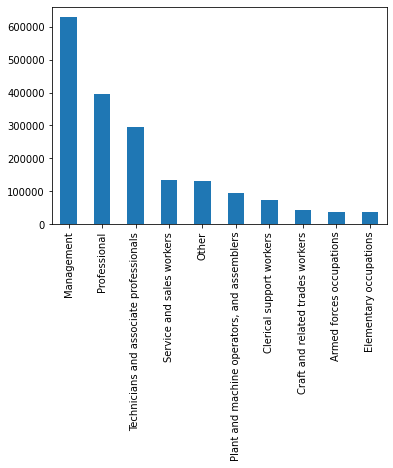

In [ ]:
import matplotlib.pyplot as plt
import pandas

data = df
fig, ax = plt.subplots()
data['textual_major_categories'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
len(df)

1877343

In [ ]:
df.head(1)

,id,number,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,textual_major_categories
0,68407277,3,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,9,0,Other


In [ ]:
%cd '/content/gdrive/My Drive/Datathon/'

/content/gdrive/.shortcut-targets-by-id/1KAt26RbjXVUTFl0HeTcsLK0FcXRAYiWe/Datathon


In [ ]:
df.shape

(1877343, 163)

In [ ]:
df.to_csv('./Data/new-accepted-final.csv', index=False)

In [ ]:
%cd /content

/content


In [ ]:
!ls

gdrive	sample_data


In [ ]:
df.to_csv('new_table.csv', index=False, sep='\t')

In [ ]:
!wc -l new_table.csv

1877344 new_table.csv


In [ ]:
!zip new_table.zip new_table.csv

  adding: new_table.csv (deflated 77%)


In [ ]:
!rsync -r --info=progress2 --info=name0 new_table.zip gdrive/MyDrive/new_table.zip

    350,671,380 100%  154.74MB/s    0:00:02 (xfr#1, to-chk=0/1)


In [ ]:
ls gdrive/

MyDrive/


In [ ]:
import pandas as pd

In [ ]:
new_df = pd.read_csv("./Data/all-accepted-final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
new_df.shape

(22125, 163)

In [ ]:
new_df.head(5)['zip_code']

0    190xx
1    577xx
2    605xx
3    076xx
4    174xx
Name: zip_code, dtype: object

In [ ]:
major_preds[:5]

[0, 1, 6, 2, 1]

In [ ]:
textual_preds[:5]

['Management',
 'Professional',
 'Plant and machine operators, and assemblers',
 'Technicians and associate professionals',
 'Professional']

In [ ]:
df['major_categories'] = []